In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib import colors
import function as f
import os

sns.set_theme(style="ticks")

In [4]:
# --- User inputs ---
figformat = 'pdf'
dpi=500
figpath = '../figures/'


     
**Figure 1**

Plotted in two parts, combined and colored in Illustrator
   

In [5]:
HarvardForest = [42.525,-72.159]
Chacaltaya = [-16.2,-68.12]
GunnPoint = [-12.262,131.038]

In [17]:
ls ../../Model_data/HarvardForest

GC_0p5x0p625_dd.csv    GC_2x2p5_dd.csv    HF_gfs_avgsens.nc     ST_gfs.csv
GC_0p5x0p625_dd.nc     GC_2x2p5_dd.nc     HF_merra2_avgsens.nc  ST_merra.csv
GC_0p5x0p625_nodd.csv  GC_2x2p5_nodd.csv  HF_nam_avgsens.nc     ST_nam.csv
GC_0p5x0p625_nodd.nc   GC_2x2p5_nodd.nc   Priors/


In [51]:
#figure paths

#model path
surf_path = '../../Model_data/ATARS/GEOSChem/run0018/GEOSChem.SpeciesConc.allsurf.nc4'
Chac_path_12p8 = '../../Model_data/CHC/GEOSChem/Base/GEOSChem.SpeciesConcCHC.alltime_d.nc4'
Chac_path_14p1 = '../../Model_data/CHC/GEOSChem/Base/GEOSChem.SpeciesConc.alltime_d.14p1.nc4' #'/net/fs03/d0/emroy/GCrundir/run0018/OutputDir/2014_2015/GEOSChem.SpeciesConc.201*01_0000z.nc4'
GP_nest_path = '../../Model_data/ATARS/GEOSChem/run0022/GEOSChem.SpeciesConcGPA.allsurf.nc4'
HF_nest_path = '../../Model_data/HarvardForest/GC_0p5x0p625_dd.nc'

#obs paths
HF_obs_path =  '../../Measurement_data/hf373-01-30min-gem-flux.csv'  #'/home/emroy/GP/ICMGP_2024/data/knb-lter-hfr.373.1/hf373-01-30min-gem-flux.csv'
GP_obs_path =  '../../Measurement_data/ATARS_2014_2015.xlsx'  #'/home/emroy/GP/AUBB/data/TekxGP_5m_14_17_20221006.xlsx'
CHC_obs_path = '../../Measurement_data/L1_TGM_CHC_2015.csv' #'/net/fs03/d0/arifein/obs_datasets/TGM/CHC/2015/L1_TGM_CHC_2015.csv'

In [52]:
#model read
r18 = xr.open_dataset(surf_path)
r18_1415 = xr.open_dataset(Chac_path_14p1)
rsh = xr.open_dataset(Chac_path_12p8)
r22 = xr.open_dataset(GP_nest_path)
r51 = xr.open_dataset(HF_nest_path)

In [53]:
#HF observation read
HF_obs = pd.read_csv(HF_obs_path)
HF_obs['datetime'] = pd.to_datetime(HF_obs['datetime'])
HF_obs = HF_obs.set_index('datetime')

In [54]:
#GP obs read
GP_obs = pd.read_excel(GP_obs_path)
GP_obs = GP_obs.set_index('date')

In [55]:
#CHC obs read
CHC_obs = pd.read_csv(CHC_obs_path,delimiter=';',decimal=",",skiprows=35)
CHC_obs['datetime_local'] = pd.to_datetime(CHC_obs['Date/time (UTC)'])
CHC_obs = CHC_obs.set_index('datetime_local')
CHC_obs = CHC_obs.shift(periods=-4,freq='H')
CHC_obs = CHC_obs.sort_index()
CHC_obs = CHC_obs.resample('1D').mean()

In [56]:
CHC_obs

,TGM_valid
datetime_local,
2014-12-31,0.876200
2015-01-01,0.994602
2015-01-02,0.885254
2015-01-03,0.930963
2015-01-04,1.114707
...,...
2015-12-27,1.426626
2015-12-28,1.403084
2015-12-29,1.474774


In [57]:
%%capture --no-stdout

r18_HF = r18['SpeciesConcVV_Hg0'].sel(lat=HarvardForest[0],lon=HarvardForest[1],method='nearest').to_dataframe()
r51_HF = r51.sel(lat=HarvardForest[0],lon=HarvardForest[1],method='nearest')['SpeciesConcVV_Hg0'].to_dataframe()

In [58]:
%%capture --no-stdout
r18_CH = f.HgConversion(r18_1415['SpeciesConcVV_Hg0'].to_dataframe())#f.HgConversion(r18_1415.isel(lev=19)['SpeciesConcVV_Hg0'].sel(lat=Chacaltaya[0],lon=Chacaltaya[1],method='nearest').to_dataframe())
rsh_CH = f.HgConversion(rsh.sel(lat=Chacaltaya[0],lon=Chacaltaya[1],method='nearest').isel(lev=19)['SpeciesConc_Hg0'].to_dataframe())

In [59]:
%%capture --no-stdout
r18_GP = r18.sel(lat=GunnPoint[0],lon=GunnPoint[1],method='nearest')['SpeciesConcVV_Hg0'].to_dataframe()
r22_GP = r22.sel(lat=GunnPoint[0],lon=GunnPoint[1],method='nearest')['SpeciesConcVV_Hg0'].to_dataframe()

In [60]:
y=2015
xticks_15 = ['2-15-'+str(y),
          '4-15-'+str(y),
          '6-15-'+str(y),
          '8-15-'+str(y),
          '10-15-'+str(y),
          '12-15-'+str(y)]

y=2019
xticks_19 = ['2-15-'+str(y),
          '4-15-'+str(y),
          '6-15-'+str(y),
          '8-15-'+str(y),
          '10-15-'+str(y),
          '12-15-'+str(y)]

In [61]:
dt_12 = np.full(len(rsh_CH['SpeciesConc_Hg0']),pd.to_datetime('1-15-2016'))
dt_14 = np.full(len(r18_CH['SpeciesConcVV_Hg0']),pd.to_datetime('1-27-2016'))
dt_obs = np.full(len(CHC_obs.resample('1D').mean()['TGM_valid']),pd.to_datetime('2-8-2016'))

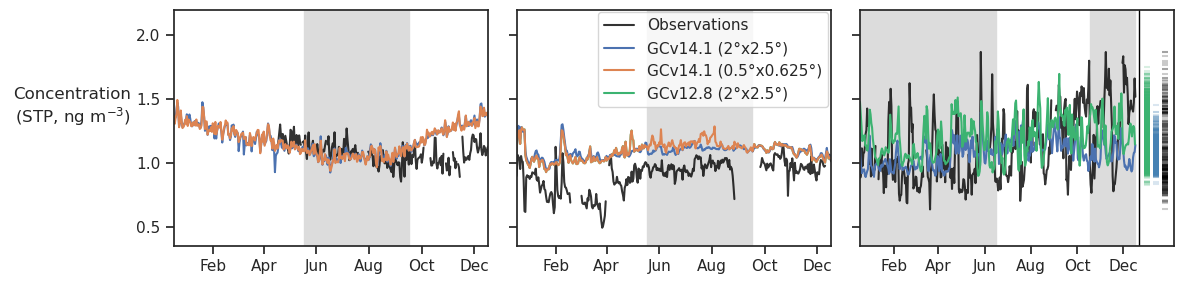

In [65]:
#lets make a three panel version of this plot
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)

#Harvard Forest
ax[0].axvspan(pd.to_datetime('2019-06-01'),pd.to_datetime('2019-09-30'),color='gainsboro')
ax[0].plot(HF_obs.resample('1D').mean()['airGEM'],c='black',alpha=0.8)
r18_HF['SpeciesConcVV_Hg0'].plot(ax=ax[0])
r51_HF['SpeciesConcVV_Hg0'].resample('1D').mean().plot(ax=ax[0])
ax[0].set_xlim('2019-01-01','2019-12-31')
ax[0].set_xticks(xticks_19)
ax[0].set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'],rotation=0,ha='center')
ax[0].set_xlabel('')

#Gunn Point
ax[1].axvspan(pd.to_datetime('2015-06-01'),pd.to_datetime('2015-09-30'),color='gainsboro')
ax[1].plot(GP_obs.resample('1D').mean()['conc5_avg'],c='black',alpha=0.8,label='Observations')
r18_GP['SpeciesConcVV_Hg0'].plot(ax=ax[1],label='GCv14.1 (2°x2.5°)')
r22_GP['SpeciesConcVV_Hg0'].resample('1D').mean().plot(ax=ax[1],label='GCv14.1 (0.5°x0.625°)')
r22_GP['SpeciesConcVV_Hg0'].resample('1D').mean().plot(ax=ax[1],c='mediumseagreen',label='GCv12.8 (2°x2.5°)',zorder=0)

ax[1].set_xlim('2015-01-01','2015-12-31')
ax[1].set_xticks(xticks_15)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'],rotation=0,ha='center')

#Chacaltaya
ax[2].axvspan(pd.to_datetime('2015-11-01'),pd.to_datetime('2015-12-31'),color='gainsboro')
ax[2].axvspan(pd.to_datetime('2015-01-01'),pd.to_datetime('2015-06-30'),color='gainsboro')
ax[2].plot(CHC_obs.resample('1D').mean()['TGM_valid'],c='black',alpha=0.8)
r18_CH['SpeciesConcVV_Hg0'].plot(ax=ax[2])
rsh_CH['SpeciesConc_Hg0'].plot(ax=ax[2],c='mediumseagreen')
ax[2].set_xlim('2015-01-01','2016-2-20')
ax[2].set_xticks(xticks_15)
ax[2].set_xticklabels(['Feb','Apr','Jun','Aug','Oct','Dec'],rotation=0,ha='center')
ax[2].set_xlabel('')
ax[2].axvline('2016-1-05',linestyle='-',c='black',linewidth=1)
ax[2].scatter(dt_obs,CHC_obs.resample('1D').mean()['TGM_valid'],color='black',s=14,marker='_',alpha=0.2)
ax[2].scatter(dt_14,r18_CH['SpeciesConcVV_Hg0'],color='steelblue',s=14,marker='_',alpha=0.2)
ax[2].scatter(dt_12,rsh_CH['SpeciesConc_Hg0'],color='mediumseagreen',s=14,marker='_',alpha=0.2)


ax[0].set_ylabel('Concentration\n (STP, ng m$^{-3}$)',rotation=0,ha='right')
plt.subplots_adjust(wspace=0.1, hspace=0)
ax[1].legend(bbox_to_anchor=(0.99, 0.99), loc='upper right', borderaxespad=0.)
ax[1].set_ylim(0.35,2.2)
plt.tight_layout()
plt.savefig(figpath+'Fig1_TimeSeries_shaded.'+figformat,dpi=dpi,transparent=True)

In [66]:
#cmap_in = 'Spectral_r'
cmap_in = sns.color_palette('GnBu',as_cmap=True)  #GnBu #sns.light_palette("seagreen", as_cmap=True)#'turbo'
Levels = [0.8,1,1.2,1.4,1.6,1.8,2]
cmap_v = plt.get_cmap(cmap_in)
colors_v = cmap_v(np.linspace(0, 1, len(Levels)+1))# - 1))
cmap, norm = colors.from_levels_and_colors(Levels, colors_v,extend='both')


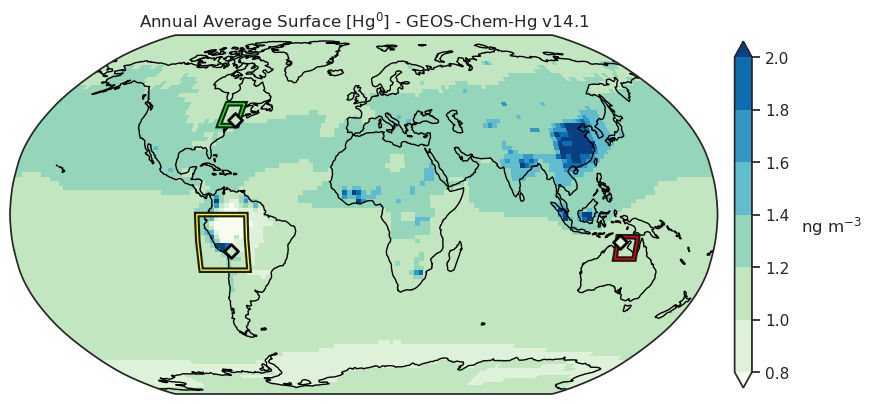

In [68]:
#This will be basis for figure 1 of ACP paper
conc = r18.mean('time')['SpeciesConcVV_Hg0']
lats = conc.lat[:]
lons = conc.lon[:]

proj = ccrs.Robinson() #ccrs.PlateCarree()
proj_data = ccrs.PlateCarree()

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(1, 1, 1, projection=proj)

g = ax.pcolormesh(lons, lats, conc,
             transform=proj_data,
             cmap=cmap,
             norm=norm)

cbar = plt.colorbar(g,pad=0.02,shrink=0.9,orientation='vertical',ticks=[0.8,1,1.2,1.4,1.6,1.8,2],extend='both')
cbar.set_label('ng m$^{-3}$',rotation=0,labelpad=30)
ax.coastlines(zorder=1)

ax.set_title('Annual average Hg$^{0}$ concentration - GEOS-Chem-Hg v14.1')

ax.add_patch(mpatches.Rectangle(xy=[-85, -25], width=25, height=25,
                                facecolor='none', edgecolor='k',linewidth=4,
                                transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[-85, -25], width=25, height=25,
                                facecolor='none', edgecolor='yellow',linewidth=1,
                                transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[-80, 40], width=10, height=10,
                                facecolor='none', edgecolor='k',linewidth=4,
                                transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[-80, 40], width=10, height=10,
                                facecolor='none', edgecolor='lime',linewidth=1,
                                transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[130, -20], width=10, height=10,
                                facecolor='none', edgecolor='k',linewidth=4,
                                transform=ccrs.PlateCarree()))

ax.add_patch(mpatches.Rectangle(xy=[130, -20], width=10, height=10,
                                facecolor='none', edgecolor='red',linewidth=1,
                                transform=ccrs.PlateCarree()))
ax.set_title('Annual Average Surface [Hg$^{0}$] - GEOS-Chem-Hg v14.1')

#Gunn point
ax.scatter(GunnPoint[1],GunnPoint[0],c=GP_obs['conc5_avg'].mean(),
           cmap=cmap,
           transform=proj_data,
           norm=norm,
           marker='D',
           edgecolors='black',
           linewidth=2,
           s=50)
#Chacaltaya
ax.scatter(Chacaltaya[1],Chacaltaya[0],c=CHC_obs['TGM_valid'].mean(),
           cmap=cmap,
           transform=proj_data,
           norm=norm,
           marker='D',
           edgecolors='black',
           linewidth=2,
           s=50)
#Harvard Forest
ax.scatter(HarvardForest[1],HarvardForest[0],c=HF_obs['airGEM'].mean(),
           cmap=cmap,
           transform=proj_data,
           norm=norm,
           marker='D',
           edgecolors='black',
           linewidth=2,
           s=50)

plt.savefig(figpath+'Fig1_GlobalConc_trunc.'+figformat,dpi=dpi,transparent=True)


     
**Figure 2**

Requires posteriors and priors as inputs   

In [69]:
data_path = '../posteriors/'

In [70]:
#read in Harvard Forest posteriors
cols = ['gc','gc_n','gfs_5m','merra_250m','nam_250m']

posterior_df_95 = pd.read_csv(data_path+'HarvardForest_posterior_95th.csv',usecols=cols)

In [71]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])


In [72]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-GFS','STILT-MERRA2','STILT-NAM']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.25°x0.25°','30m, 0.5°x0.5°','30m, 0.1°x0.1°']

#figure parameters
textheight=3200
textloc=4
fontsize=12
fontspace=850
priorheight=0.45
priorlinewidth=2
pctileheight=2700
x_label='Dry Deposition (ug m$^{-2}$)'

#colors
pal = sns.cubehelix_palette(6,start=1.95, rot=0,light=0.7)#sns.cubehelix_palette(10, rot=-.25, light=.7)
gry = sns.color_palette('binary',11)

#prior information
#Note: calculated values are from figures_100725.ipynb, direct inputs simplify!
#11/30/2025 update: Taking Obrist et al (2021) number directly from paper rather than calculting

prior_flux = [21.9,9.894,8.1]#,period_litterfall] #calculated Obrist growing season uptake: 19.775
prior_flux_n = [21.9,12.556,8.1] #calculated Obrist growing season uptake: 19.775
prior_clrs = [gry[10],gry[7],gry[5]]#,gry[3]]
prior_style = ['-','--',':']#,':']

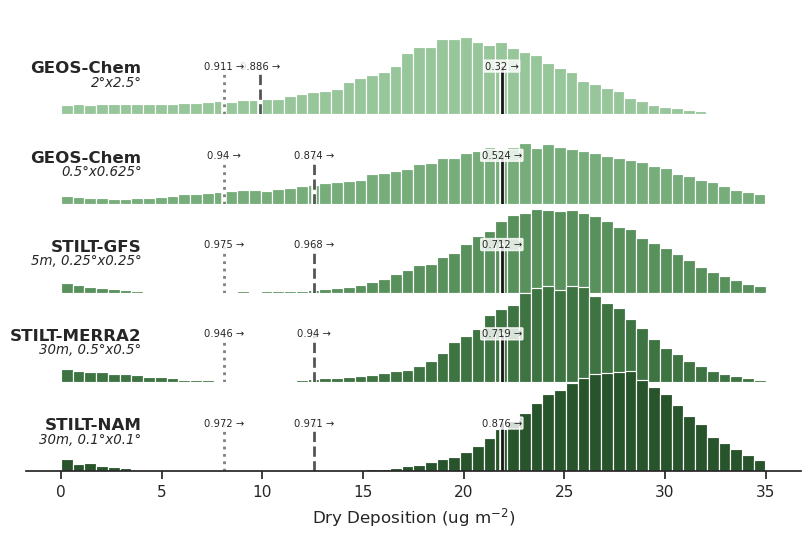

In [74]:
#receptor filt = off
posterior_df = posterior_df_95.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=60)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    if i == 0:
        for m in prior_flux:
            pctile = percentile_value(posterior_df,n,m,decimals=3)
            ax[i].text(m,
                       pctileheight,str(pctile)+' →',
                       fontsize=fontsize*0.6,
                       ha='center',
                       bbox=dict(facecolor="white",
                                 alpha=0.8,
                                 boxstyle="round,pad=0.1"))
            ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
            ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
            j = j+1
    else:
        for m in prior_flux_n:
            pctile = percentile_value(posterior_df,n,m,decimals=3)
            ax[i].text(m,
                       pctileheight,str(pctile)+' →',
                       fontsize=fontsize*0.6,
                       ha='center',
                       bbox=dict(facecolor="white",
                                 alpha=0.8,
                                 boxstyle="round,pad=0.1"))
            ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
            ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
            j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

plt.savefig(figpath+'HarvardForest_95th_fig.'+figformat,dpi=dpi,transparent=True)
plt.show()
plt.close()



     
**Figure 3a**

Requires posteriors and priors as inputs   

In [75]:
#read in Gunn Point posteriors
cols = ['gc','gc_n','merra2_gfed','gdas_gfed','merra2_finn','gdas_finn']

posterior_df_95 = pd.read_csv(data_path+'GunnPoint_posterior_2014_95th.csv',usecols=cols)

priors = pd.read_csv(data_path+'GunnPoint_priors_2014.csv')

In [76]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-MERRA2-GFED4s','STILT-MERRA2-FINN1.5','STILT-GDAS-GFED4s','STILT-GDAS-FINN1.5']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°']

#figure parameters
textheight=7500
textloc=-1
fontsize=12
fontspace=2000
priorheight=0.33
priorlinewidth=2
pctileheight=5500
x_label='Biomass Burning (Mg)'

#colors
pal = sns.color_palette("flare",10)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['GFED4s'].values[0],priors['FINN1p5'].values[0]]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

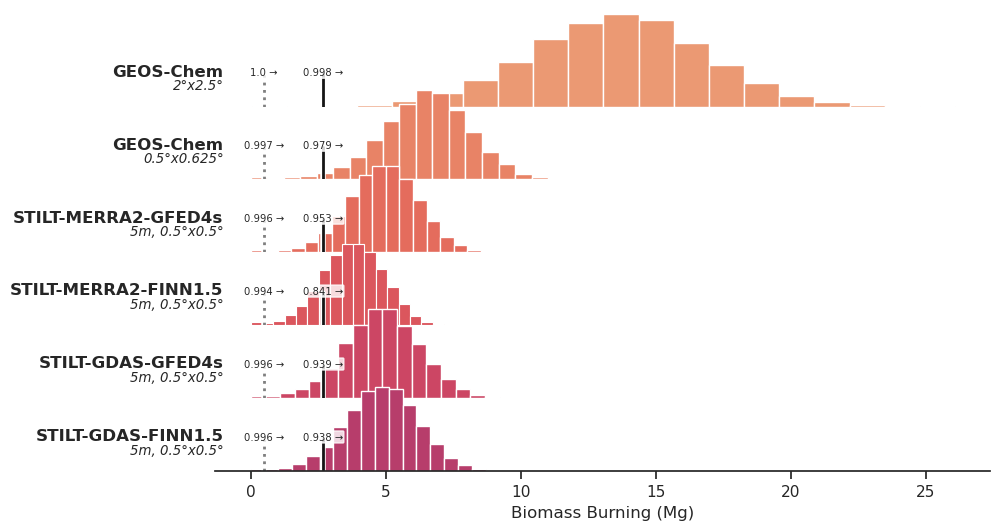

In [77]:
#receptor filt = off
posterior_df = posterior_df_95.copy()

#figure parameters
textheight=7500
textloc=-1
fontsize=12
fontspace=2500
priorheight=0.33
priorlinewidth=2
pctileheight=5500

fig,ax=plt.subplots(6,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(bottom=True,left=True,ax=ax[4])
sns.despine(left=True,ax=ax[5])

plt.savefig(figpath+'GunnPoint_95th_2014_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.show()
plt.close()



     
**Figure 3b**

Requires posteriors and priors as inputs   

In [78]:
#read in Harvard Forest posteriors
cols = ['gc','gc_n','merra2_gfed','gdas_gfed','merra2_finn','gdas_finn']

posterior_df_95 = pd.read_csv(data_path+'GunnPoint_posterior_2015_95th.csv',usecols=cols)

priors = pd.read_csv(data_path+'GunnPoint_priors_2015.csv')

In [79]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])


In [80]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-MERRA2-GFED4s','STILT-MERRA2-FINN1.5','STILT-GDAS-GFED4s','STILT-GDAS-FINN1.5']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°']

#figure parameters
textheight=4000
textloc=1
fontsize=12
fontspace=1500
priorheight=0.45
priorlinewidth=2
pctileheight=2700
x_label='Biomass Burning (Mg)'

#colors
pal = sns.color_palette("flare",10)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['GFED4s'].values[0],priors['FINN1p5'].values[0]]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

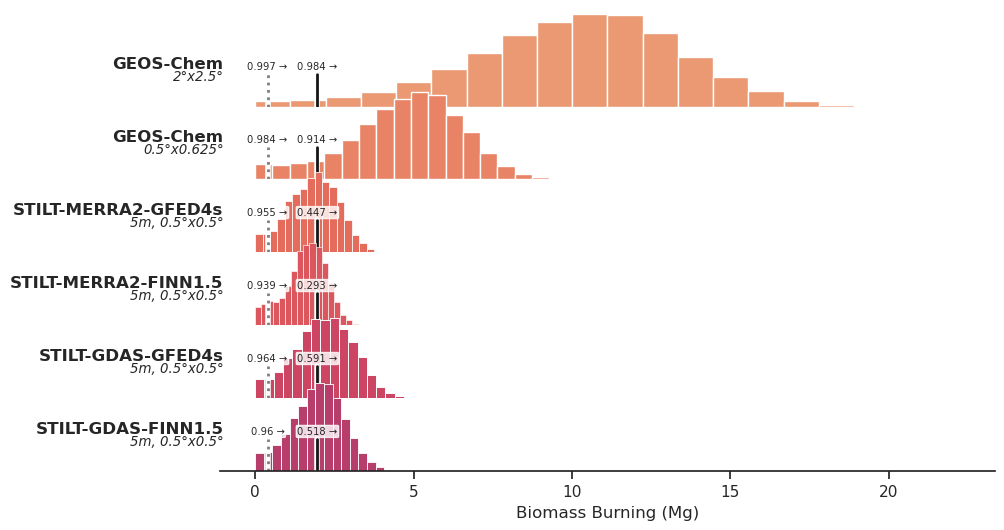

In [81]:
#receptor filt = off
posterior_df = posterior_df_95.copy()

#figure parameters
textheight=7500
textloc=-1
fontsize=12
fontspace=2000
priorheight=0.33
priorlinewidth=2
pctileheight=5500

fig,ax=plt.subplots(6,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(bottom=True,left=True,ax=ax[4])
sns.despine(left=True,ax=ax[5])

plt.savefig(figpath+'GunnPoint_95th_2015_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()



**Figure 4 (a and b)**

Requires emission datasets as inputs. These can be downloaded from the GEOS-Chem data repository.  

Data download URLs:
EDGAR emissions: http://geoschemdata.wustl.edu/ExtData/HEMCO/MERCURY/v2020-07/EDGAR/
AMAP emissions: http://geoschemdata.wustl.edu/ExtData/HEMCO/MERCURY/v2022-10/

In [82]:
def zerofilter(data,thresh=1e-10):
    zf = data.where(data>thresh)    
    return zf

In [85]:
amap_path = '../../Model_data/CHC/Priors/GMA_emissions_Hg.0.25x0.25.2015.nc'
edgar_path = '../../Model_data/CHC/Priors/EDGAR_gold_A_2010_Hg.nc'

In [86]:
amap = xr.open_dataset(amap_path)
asgm_ugm2yr = amap['emi_hg_0_asgm'].isel(time=0)*1e9*3600*24*365
asgm_ugm2yr_zf = zerofilter(asgm_ugm2yr)

edgar = xr.open_dataset(edgar_path)
ed_asgm_ugm2yr = edgar['emi_hg_g']*1e9*3600*24*365
ed_asgm_ugm2yr_zf = zerofilter(ed_asgm_ugm2yr)

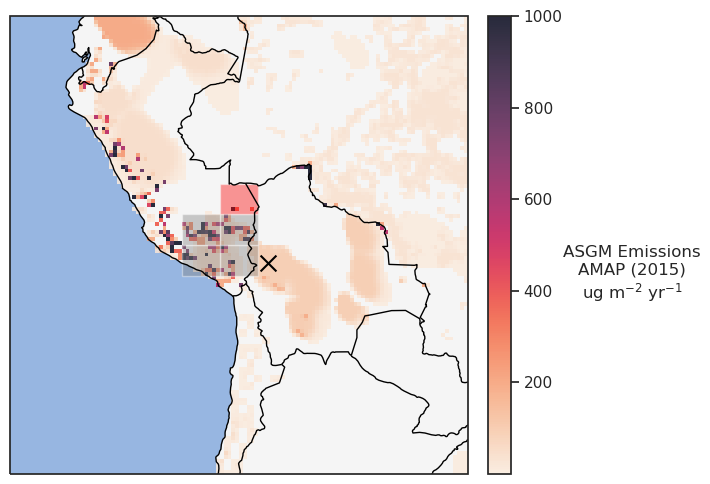

In [87]:
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

Ch = [-68.12,-16.2]

lonmin = -85
lonmax = -55
latmin = -30
latmax = 0
ext = [lonmin, lonmax, latmin, latmax]

ems = asgm_ugm2yr_zf
lats = ems.lat[:]
lons = ems.lon[:]

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(1, 1, 1, projection=proj)

g = ax.pcolormesh(lons, lats, ems,
             transform=proj,
             cmap='rocket_r',
             alpha=0.85,
             vmax=1000)

cbar = plt.colorbar(g,pad=0.02,shrink=1,orientation='vertical')
cbar.set_label('ASGM Emissions\nAMAP (2015)\nug m$^{-2}$ yr$^{-1}$',rotation=0,labelpad=50)

ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Ch[0],Ch[1],marker='x',c='black',s=130)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(states_provinces, edgecolor='gray')
#ax.set_xticks([-80,-70,-60,-50],crs=ccrs.PlateCarree())
#ax.set_yticks([0,-5,-10,-15,-20,-25],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.tight_layout()
ax.add_patch(mpatches.Rectangle(xy=[-71.25, -17], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-71.25, -15], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-71.25, -13], width=2.5, height=2,
                                facecolor='red',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-73.75, -17], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-73.75, -15], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))

plt.savefig(figpath+'Fig4_GMA.'+figformat,dpi=dpi,transparent=True)

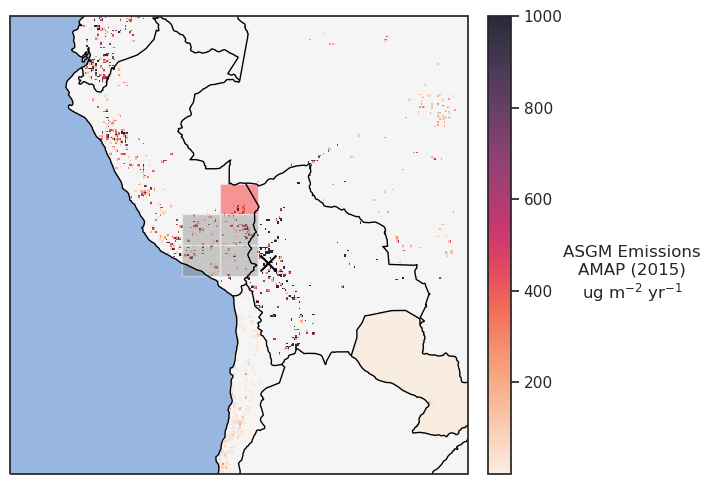

In [88]:
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

Ch = [-68.12,-16.2]

lonmin = -85
lonmax = -55
latmin = -30
latmax = 0
ext = [lonmin, lonmax, latmin, latmax]

ems = ed_asgm_ugm2yr_zf
lats = ems.lat[:]
lons = ems.lon[:]

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(1, 1, 1, projection=proj)

g = ax.pcolormesh(lons, lats, ems,
             transform=proj,
             cmap='rocket_r',
             alpha=0.85,
             vmax=1000)

cbar = plt.colorbar(g,pad=0.02,shrink=1,orientation='vertical')
cbar.set_label('ASGM Emissions\nAMAP (2015)\nug m$^{-2}$ yr$^{-1}$',rotation=0,labelpad=50)

ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Ch[0],Ch[1],marker='x',c='black',s=130)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(states_provinces, edgecolor='gray')
#ax.set_xticks([-80,-70,-60,-50],crs=ccrs.PlateCarree())
#ax.set_yticks([0,-5,-10,-15,-20,-25],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.tight_layout()
ax.add_patch(mpatches.Rectangle(xy=[-71.25, -17], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-71.25, -15], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-71.25, -13], width=2.5, height=2,
                                facecolor='red',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-73.75, -17], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-73.75, -15], width=2.5, height=2,
                                facecolor='gray',
                                alpha=0.4,
                                transform=ccrs.PlateCarree()))

plt.savefig(figpath+'Fig4_EDGAR.'+figformat,dpi=dpi,transparent=True)


**Figure 5 (a and b)**


In [89]:
data_path

'../posteriors/'

In [90]:
#read in Harvard Forest posteriors
cols = ['mdd','apu','are','npun','spun']

gc_95 = pd.read_csv(data_path+'Chacaltaya_gcbase_95th.csv',usecols=cols)
merragma_95 = pd.read_csv(data_path+'Chacaltaya_merragma_95th.csv',usecols=cols)
gdasgma_95 = pd.read_csv(data_path+'Chacaltaya_gdasgma_95th.csv',usecols=cols)
merraed10_95 = pd.read_csv(data_path+'Chacaltaya_merraed10_95th.csv',usecols=cols)
gdased10_95 = pd.read_csv(data_path+'Chacaltaya_gdased10_95th.csv',usecols=cols)

#read priors
priors = pd.read_csv(data_path+'Chacaltaya_priors.csv')

In [91]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])

def loc_compile(dflist,namelist,loc='mdd'):
    i = 0
    for df in dflist:
        if i == 0:
            df_comp = pd.DataFrame({namelist[i]:df[loc]})
        else:
            df_comp[namelist[i]] = df[loc]
        i = i+1
    return df_comp
     

In [92]:
dflist =   [gc_95,merragma_95,gdasgma_95,merraed10_95,gdased10_95]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd = loc_compile(dflist,namelist,loc='mdd')
apu = loc_compile(dflist,namelist,loc='apu')
are = loc_compile(dflist,namelist,loc='are')
npun = loc_compile(dflist,namelist,loc='npun')
spun = loc_compile(dflist,namelist,loc='spun')
allregions = spun+npun+are+apu+mdd


In [93]:
#all regions
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=7500
textloc=3.5 #-22
fontsize=12
fontspace=1700
priorheight=0.45
priorlinewidth=2
pctileheight=6000
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['gc'].sum(),priors['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

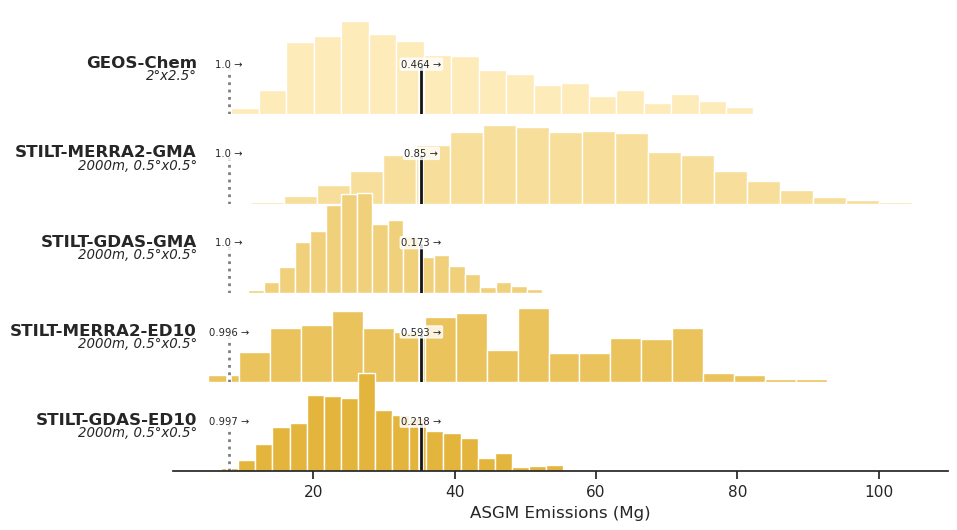

In [94]:
posterior_df = allregions.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

plt.savefig(figpath+'Chacaltaya_allregions_95th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()


In [95]:
#all regions
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=10000
textloc=-2 #-22
fontsize=12
fontspace=3500
priorheight=0.45
priorlinewidth=2
pctileheight=13000
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors[priors['regions']=='mdd']['gc'].values[0]]#,priors[priors['regions']=='mdd']['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10]]#,gry[5]]#,gry[3]]
prior_style = ['-']#,':']#,':']

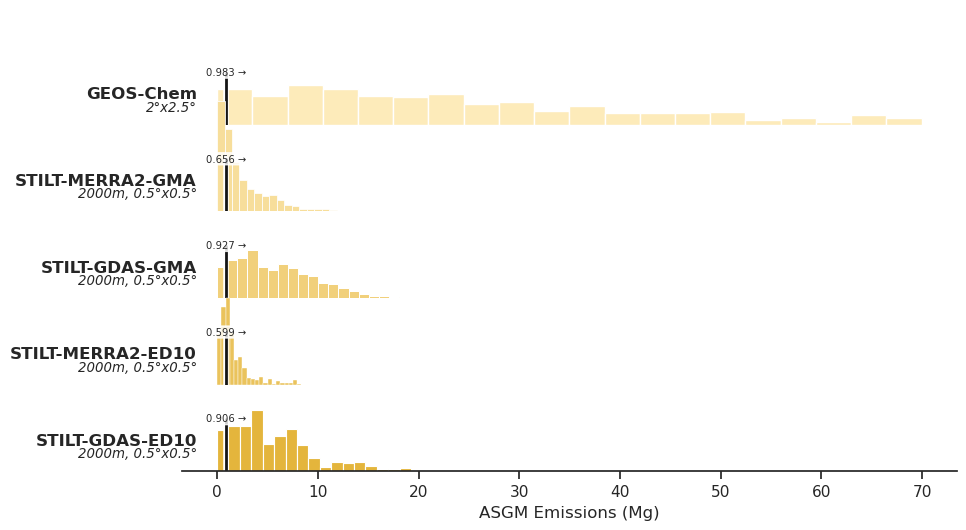

In [96]:
posterior_df = mdd.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

plt.savefig(figpath+'Chacaltaya_mdd_95th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.show()
plt.close()



**Figure 6**

Requires a little bit of everything!

In [97]:
cols = ['gc','gc_n','gfs_5m','merra_250m','nam_250m']

posterior_HF_95 = pd.read_csv(data_path+'HarvardForest_posterior_95th.csv',usecols=cols)
posterior_HF_90 = pd.read_csv(data_path+'HarvardForest_posterior_90th.csv',usecols=cols)
posterior_HF_50 = pd.read_csv(data_path+'HarvardForest_posterior_IQR.csv',usecols=cols)

HF = pd.DataFrame({'95th percentile range\nAll models':posterior_HF_95.melt()['value'],'90th percentile range\nAll models':posterior_HF_90.melt()['value'],'Interquartile range\nAll models':posterior_HF_50.melt()['value']}).melt()


In [98]:
#read in Gunn Point posteriors
cols = ['gc','gc_n','merra2_gfed','gdas_gfed','merra2_finn','gdas_finn']

posterior_GP14_95 = pd.read_csv(data_path+'GunnPoint_posterior_2014_95th.csv',usecols=cols)
posterior_GP14_90 = pd.read_csv(data_path+'GunnPoint_posterior_2014_90th.csv',usecols=cols)
posterior_GP14_50 = pd.read_csv(data_path+'GunnPoint_posterior_2014_IQR.csv',usecols=cols)

GP14 = pd.DataFrame({'95th percentile range\nAll models':posterior_GP14_95.melt()['value'],'90th percentile range\nAll models':posterior_GP14_90.melt()['value'],'Interquartile range\nAll models':posterior_GP14_50.melt()['value']}).melt()

In [99]:
#read in Gunn Point posteriors (2015)
cols = ['gc','gc_n','merra2_gfed','gdas_gfed','merra2_finn','gdas_finn']

posterior_GP15_95 = pd.read_csv(data_path+'GunnPoint_posterior_2015_95th.csv',usecols=cols)
posterior_GP15_90 = pd.read_csv(data_path+'GunnPoint_posterior_2015_90th.csv',usecols=cols)
posterior_GP15_50 = pd.read_csv(data_path+'GunnPoint_posterior_2015_IQR.csv',usecols=cols)

GP15 = pd.DataFrame({'95th percentile range\nAll models':posterior_GP15_95.melt()['value'],'90th percentile range\nAll models':posterior_GP15_90.melt()['value'],'Interquartile range\nAll models':posterior_GP15_50.melt()['value']}).melt()

In [100]:
#need to figure out how to read in Chacaltaya data

def loc_compile(dflist,namelist,loc='mdd'):
    i = 0
    for df in dflist:
        if i == 0:
            df_comp = pd.DataFrame({namelist[i]:df[loc]})
        else:
            df_comp[namelist[i]] = df[loc]
        i = i+1
    return df_comp

cols = ['mdd','apu','are','npun','spun']

gc_95 = pd.read_csv(data_path+'Chacaltaya_gcbase_95th.csv',usecols=cols)
merragma_95 = pd.read_csv(data_path+'Chacaltaya_merragma_95th.csv',usecols=cols)
gdasgma_95 = pd.read_csv(data_path+'Chacaltaya_gdasgma_95th.csv',usecols=cols)
merraed10_95 = pd.read_csv(data_path+'Chacaltaya_merraed10_95th.csv',usecols=cols)
gdased10_95 = pd.read_csv(data_path+'Chacaltaya_gdased10_95th.csv',usecols=cols)

dflist =   [gc_95,merragma_95,gdasgma_95,merraed10_95,gdased10_95]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd_95 = loc_compile(dflist,namelist,loc='mdd')
apu_95 = loc_compile(dflist,namelist,loc='apu')
are_95 = loc_compile(dflist,namelist,loc='are')
npun_95 = loc_compile(dflist,namelist,loc='npun')
spun_95 = loc_compile(dflist,namelist,loc='spun')
allregions_95 = spun_95+npun_95+are_95+apu_95+mdd_95

allregions_95_m = allregions_95.melt()

#now, 90th
gc_90 = pd.read_csv(data_path+'Chacaltaya_gcbase_90th.csv',usecols=cols)
merragma_90 = pd.read_csv(data_path+'Chacaltaya_merragma_90th.csv',usecols=cols)
gdasgma_90 = pd.read_csv(data_path+'Chacaltaya_gdasgma_90th.csv',usecols=cols)
merraed10_90 = pd.read_csv(data_path+'Chacaltaya_merraed10_90th.csv',usecols=cols)
gdased10_90 = pd.read_csv(data_path+'Chacaltaya_gdased10_90th.csv',usecols=cols)

dflist =   [gc_90,merragma_90,gdasgma_90,merraed10_90,gdased10_90]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd_90 = loc_compile(dflist,namelist,loc='mdd')
apu_90 = loc_compile(dflist,namelist,loc='apu')
are_90 = loc_compile(dflist,namelist,loc='are')
npun_90 = loc_compile(dflist,namelist,loc='npun')
spun_90 = loc_compile(dflist,namelist,loc='spun')
allregions_90 = spun_90+npun_90+are_90+apu_90+mdd_90

allregions_90_m = allregions_90.melt()

#now, 90th
gc_iqr = pd.read_csv(data_path+'Chacaltaya_gcbase_IQR.csv',usecols=cols)
merragma_iqr = pd.read_csv(data_path+'Chacaltaya_merragma_IQR.csv',usecols=cols)
gdasgma_iqr = pd.read_csv(data_path+'Chacaltaya_gdasgma_IQR.csv',usecols=cols)
merraed10_iqr = pd.read_csv(data_path+'Chacaltaya_merraed10_IQR.csv',usecols=cols)
gdased10_iqr = pd.read_csv(data_path+'Chacaltaya_gdased10_IQR.csv',usecols=cols)

dflist =   [gc_iqr,merragma_iqr,gdasgma_iqr,merraed10_iqr,gdased10_iqr]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd_iqr = loc_compile(dflist,namelist,loc='mdd')
apu_iqr = loc_compile(dflist,namelist,loc='apu')
are_iqr = loc_compile(dflist,namelist,loc='are')
npun_iqr = loc_compile(dflist,namelist,loc='npun')
spun_iqr = loc_compile(dflist,namelist,loc='spun')
allregions_iqr = spun_iqr+npun_iqr+are_iqr+apu_iqr+mdd_iqr

allregions_iqr_m = allregions_iqr.melt()

CH_allregions = pd.DataFrame({'95th percentile range\nAll models':allregions_95_m['value'],'90th percentile range\nAll models':allregions_90_m['value'],'Interquartile range\nAll models':allregions_iqr_m['value']}).melt()
CH_mdd = pd.DataFrame({'95th percentile range\nAll models':mdd_95.melt()['value'],'90th percentile range\nAll models':mdd_90.melt()['value'],'Interquartile range\nAll models':mdd_iqr.melt()['value']}).melt()


In [106]:
#Harvard Forest
bmin=0
bmax=40 #35
thresh_HF = 2000
bins_HF = np.arange(bmin,bmax,1).tolist()

dfs_HF = [posterior_HF_95.melt()['value'],
          posterior_HF_95.drop('gc',axis=1).melt()['value'],
          posterior_HF_90.melt()['value'],
          posterior_HF_90.drop('gc',axis=1).melt()['value'],
          posterior_HF_50.melt()['value'],
          posterior_HF_50.drop('gc',axis=1).melt()['value']]

#gunn point
bmin=0
bmax=20
thresh_GP = 2000
bins_GP = np.arange(bmin,bmax,0.5).tolist()

dfs_GP14 = [posterior_GP14_95.melt()['value'],
          posterior_GP14_95.drop('gc',axis=1).melt()['value'],
          posterior_GP14_90.melt()['value'],
          posterior_GP14_90.drop('gc',axis=1).melt()['value'],
          posterior_GP14_50.melt()['value'],
          posterior_GP14_50.drop('gc',axis=1).melt()['value']]

dfs_GP15 = [posterior_GP15_95.melt()['value'],
          posterior_GP15_95.drop('gc',axis=1).melt()['value'],
          posterior_GP15_90.melt()['value'],
          posterior_GP15_90.drop('gc',axis=1).melt()['value'],
          posterior_GP15_50.melt()['value'],
          posterior_GP15_50.drop('gc',axis=1).melt()['value']]


#Chacaltaya
bmin=0
bmax=140
thresh_CH = 2000
bins_CH = np.arange(bmin,bmax,3).tolist()
ylw = sns.color_palette("blend:#FDEBBA,#DEA81D",as_cmap=True)

dfs_CH_all = [allregions_95_m['value'],
              allregions_95.drop('gc',axis=1).melt()['value'],
              allregions_90_m['value'],
              allregions_90.drop('gc',axis=1).melt()['value'],              
              allregions_iqr_m['value'],
              allregions_iqr.drop('gc',axis=1).melt()['value']]              

dfs_CH_mdd = [mdd_95.melt()['value'],
              mdd_95.drop('gc',axis=1).melt()['value'],
              mdd_90.melt()['value'],
              mdd_90.drop('gc',axis=1).melt()['value'],
              mdd_iqr.melt()['value'],
              mdd_iqr.drop('gc',axis=1).melt()['value']]


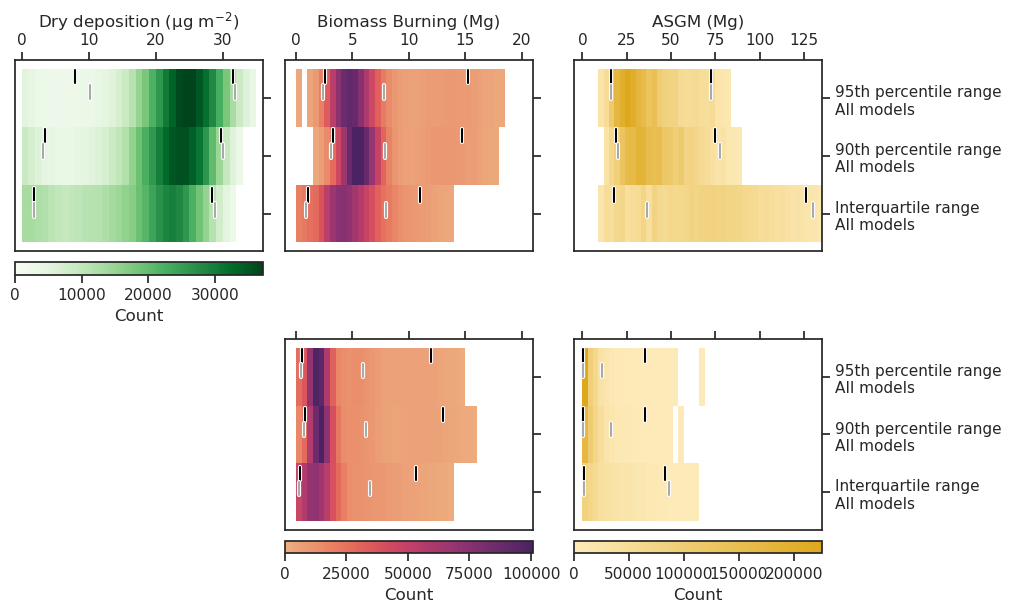

In [107]:
#locations = [[0.81,0.94],
#             [0.67,0.79],
#             [0.51,0.64],
#             [0.36,0.49],
#             [0.21,0.33],
#             [0.06,0.19]]

locations = [[0.88,0.95],
             [0.80,0.87],
             [0.57,0.64],
             [0.49,0.56],
             [0.26,0.33],
             [0.18,0.25]]


panels = [['upper_left','upper_middle','upper_right'],['.','lower_middle','lower_right']]

fig,ax=plt.subplot_mosaic(panels,figsize=(10,6),layout='constrained')

loc = 'upper_left'
g = sns.histplot(ax=ax[loc],data=HF,x='value',y='variable',bins=bins_HF,thresh=thresh_HF,cmap='Greens')
i = 0
for i in list(range(0,len(dfs_HF))):
    if i % 2 == 0:
        color = 'black'
    else:
        color = 'darkgray'
    ax[loc].axvline(dfs_HF[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_HF[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c=color)
    ax[loc].axvline(dfs_HF[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_HF[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c=color)
    i = i+1

ax[loc].set_ylabel('')
ax[loc].yaxis.tick_right()
ax[loc].set_yticklabels([])

ax[loc].set_xlim(-1,36)
ax[loc].set_xticks([0,10,20,30])
ax[loc].xaxis.tick_top()
ax[loc].xaxis.set_label_position('top')
ax[loc].set_xlabel('Dry deposition (µg m$^{-2}$)')
cbar = fig.colorbar(g.collections[0], ax=ax[loc],orientation='horizontal')
cbar.set_label('Count')


loc = 'upper_middle'
f14 = sns.histplot(ax=ax[loc],data=GP14,x='value',y='variable',bins=bins_GP,thresh=thresh_GP,cmap='flare')
i = 0
for i in list(range(0,len(dfs_GP14))):
    if i % 2 == 0:
        color = 'black'
    else:
        color = 'darkgray'
    ax[loc].axvline(dfs_GP14[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_GP14[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c=color)
    ax[loc].axvline(dfs_GP14[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_GP14[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c=color)
    i = i+1

ax[loc].yaxis.tick_right()    
ax[loc].set_ylabel('')
ax[loc].set_yticklabels([])

ax[loc].set_xlim(-1,21)
ax[loc].set_xticks([0,5,10,15,20])
ax[loc].xaxis.tick_top()
ax[loc].xaxis.set_label_position('top')
ax[loc].set_xlabel('Biomass Burning (Mg)')

loc = 'lower_middle'
f15 = sns.histplot(ax=ax[loc],data=GP15,x='value',y='variable',bins=bins_GP,thresh=thresh_GP,cmap='flare')
i = 0
for i in list(range(0,len(dfs_GP15))):
    if i % 2 == 0:
        color = 'black'
    else:
        color = 'darkgray'
    ax[loc].axvline(dfs_GP15[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_GP15[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c=color)
    ax[loc].axvline(dfs_GP15[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_GP15[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c=color)
    i = i+1

ax[loc].yaxis.tick_right()
ax[loc].set_ylabel('')
ax[loc].set_yticklabels([])

ax[loc].set_xlim(-1,21)
ax[loc].set_xticks([0,5,10,15,20])
ax[loc].xaxis.tick_top()
ax[loc].xaxis.set_label_position('top')
ax[loc].set_xlabel('')
ax[loc].set_xticklabels([])
cbar = fig.colorbar(f15.collections[0], ax=ax[loc],orientation='horizontal')
cbar.set_label('Count')

loc = 'upper_right'
y = sns.histplot(ax=ax[loc],data=CH_allregions,x='value',y='variable',bins=bins_CH,thresh=thresh_CH,cmap=ylw)
i = 0
for i in list(range(0,len(dfs_CH_all))):
    if i % 2 == 0:
        color = 'black'
    else:
        color = 'darkgray'
    ax[loc].axvline(dfs_CH_all[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_CH_all[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c=color)
    ax[loc].axvline(dfs_CH_all[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_CH_all[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c=color)
    i = i+1

ax[loc].yaxis.tick_right()
ax[loc].set_ylabel('')
#ax[loc].set_yticklabels([])

ax[loc].set_xlim(-5,135)
ax[loc].set_xticks([0,25,50,75,100,125])
ax[loc].xaxis.tick_top()
ax[loc].xaxis.set_label_position('top')
ax[loc].set_xlabel('ASGM (Mg)')

loc = 'lower_right'
y = sns.histplot(ax=ax[loc],data=CH_mdd,x='value',y='variable',bins=bins_CH,thresh=thresh_CH,cmap=ylw)
i = 0
for i in list(range(0,len(dfs_CH_mdd))):
    if i % 2 == 0:
        color = 'black'
    else:
        color = 'darkgray'
    ax[loc].axvline(dfs_CH_mdd[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_CH_mdd[i].quantile(lb),ymin=locations[i][0],ymax=locations[i][1],c=color)
    ax[loc].axvline(dfs_CH_mdd[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c='white',linewidth=3)
    ax[loc].axvline(dfs_CH_mdd[i].quantile(ub),ymin=locations[i][0],ymax=locations[i][1],c=color)
    i = i+1

ax[loc].yaxis.tick_right()
ax[loc].set_ylabel('')
#ax[loc].set_yticklabels([])

#ax[loc].axvline(50,ymin=locations[0][0],ymax=locations[0][1],c='red')
#ax['upper_right'].axvline(50,ymin=locations[0][0],ymax=locations[0][1],c='red')
#ax['upper_middle'].axvline(15,ymin=locations[0][0],ymax=locations[0][1],c='red')
#ax['lower_middle'].axvline(15,ymin=locations[0][0],ymax=locations[0][1],c='red')

ax[loc].xaxis.tick_top()
ax[loc].xaxis.set_label_position('top')
ax[loc].set_xlabel('')
ax[loc].set_xlim(-5,135)
ax[loc].set_xticks([0,25,50,75,100,125])
ax[loc].set_xticklabels([])
cbar = fig.colorbar(y.collections[0], ax=ax[loc],orientation='horizontal')
cbar.set_label('Count')
plt.savefig(figpath+'Figure6_right.'+figformat,dpi=dpi,transparent=True)